In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv(r'C:\Users\dvale\TFM\Data\to_model.csv')

In [3]:
data.head()

,civil_status_married,civil_status_never_married,civil_status_separated,region_basque_country,region_castile–la_mancha,region_andalusia,region_castile_and_leon,region_cantabria,population_density_thinly-populated_area,citizenship_spain,...,occupation_non-defined,occupation_food_preparation_assistants,bad_health_yes,bad_health_no,age,years_worked,hours_week_worked,adjusted_income,proportion_social_welfare,material_deprivation
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.761194,0.723077,0.0,0.222241,0.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.731343,0.030769,0.0,0.222241,0.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.791045,0.307692,0.0,0.258452,0.0,0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.611940,0.538462,0.0,0.258452,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.522388,0.461538,0.0,0.124813,0.0,0


In [4]:
X = data.drop(['material_deprivation'], axis=1)
y = data.material_deprivation

X_train, X_test, y_train, y_test = train_test_split(X, y)

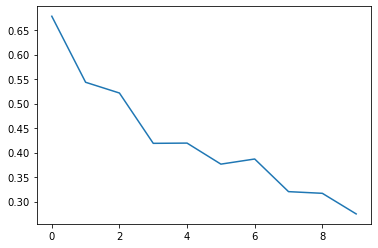

In [11]:
#I check first for the optimate neighbor number. I use the F1 metric since the data is umbalanced.

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


f1_list = []
for k in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    f1_list.append(f1_score(y_test, y_pred))
    
plt.plot(f1_list);

In [12]:
#Unbalanced data

neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8785
           1       0.68      0.68      0.68       401

    accuracy                           0.97      9186
   macro avg       0.83      0.83      0.83      9186
weighted avg       0.97      0.97      0.97      9186



In [14]:
#Balanced data - Undersample

undersampler = RandomUnderSampler(sampling_strategy='majority')
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

In [15]:
neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(X_train_us, y_train_us)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8785
           1       0.16      0.85      0.27       401

    accuracy                           0.80      9186
   macro avg       0.58      0.82      0.58      9186
weighted avg       0.96      0.80      0.86      9186



In [16]:
#Balanced data - Oversample

oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

In [17]:
neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(X_train_os, y_train_os)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8785
           1       0.68      0.68      0.68       401

    accuracy                           0.97      9186
   macro avg       0.83      0.83      0.83      9186
weighted avg       0.97      0.97      0.97      9186



In [18]:
#Balanced data - SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [19]:
neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(X_train_smote, y_train_smote)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8785
           1       0.59      0.70      0.64       401

    accuracy                           0.97      9186
   macro avg       0.79      0.84      0.81      9186
weighted avg       0.97      0.97      0.97      9186

